# Лаб 2. Ассоциативные правила

Набор данных - http://archive.ics.uci.edu/ml/datasets/Online+Retail

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
import math
from itertools import chain, combinations

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
df = online_retail.data.features

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Обработка данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-80-1f26bb90d392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Проверим отсутствующие значения

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
df[df.isnull().any(axis=1)].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [ ]:
df = df.dropna()

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int64')

<ipython-input-84-e59a45e40d06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype('int64')


In [ ]:
df[df.Quantity <= 0].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [ ]:
df = df[df.Quantity > 0]

In [ ]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df.drop('InvoiceDate', axis=1)
df.head()

<ipython-input-87-3d8667b39c31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['InvoiceDate'].dt.year
<ipython-input-87-3d8667b39c31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['InvoiceDate'].dt.month
<ipython-input-87-3d8667b39c31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8


## Анализ

In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Total
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,20.34


Топ стран по выручке

In [ ]:
salesort = df.groupby(['Country'])['Total'].sum().sort_values(ascending = False)
salesort.head(10)

,Total
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


<Axes: title={'center': 'Страны с самой большой выручкой'}, xlabel='Country'>

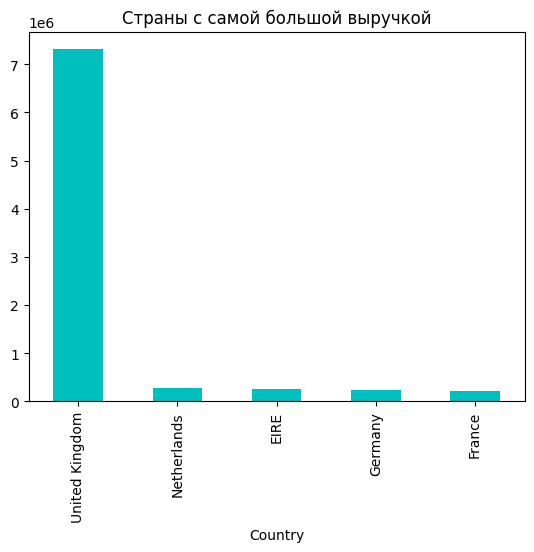

In [ ]:
salesort[:5].plot(kind = 'bar', title = 'Страны с самой большой выручкой', color='c')

<Axes: title={'center': 'Страны с самой маленькой выручкой'}, xlabel='Country'>

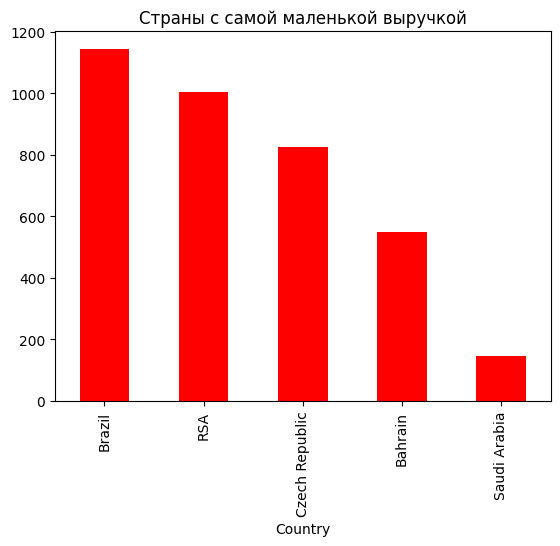

In [ ]:
salesort[32:].plot(kind = 'bar', title = 'Страны с самой маленькой выручкой', color='red')

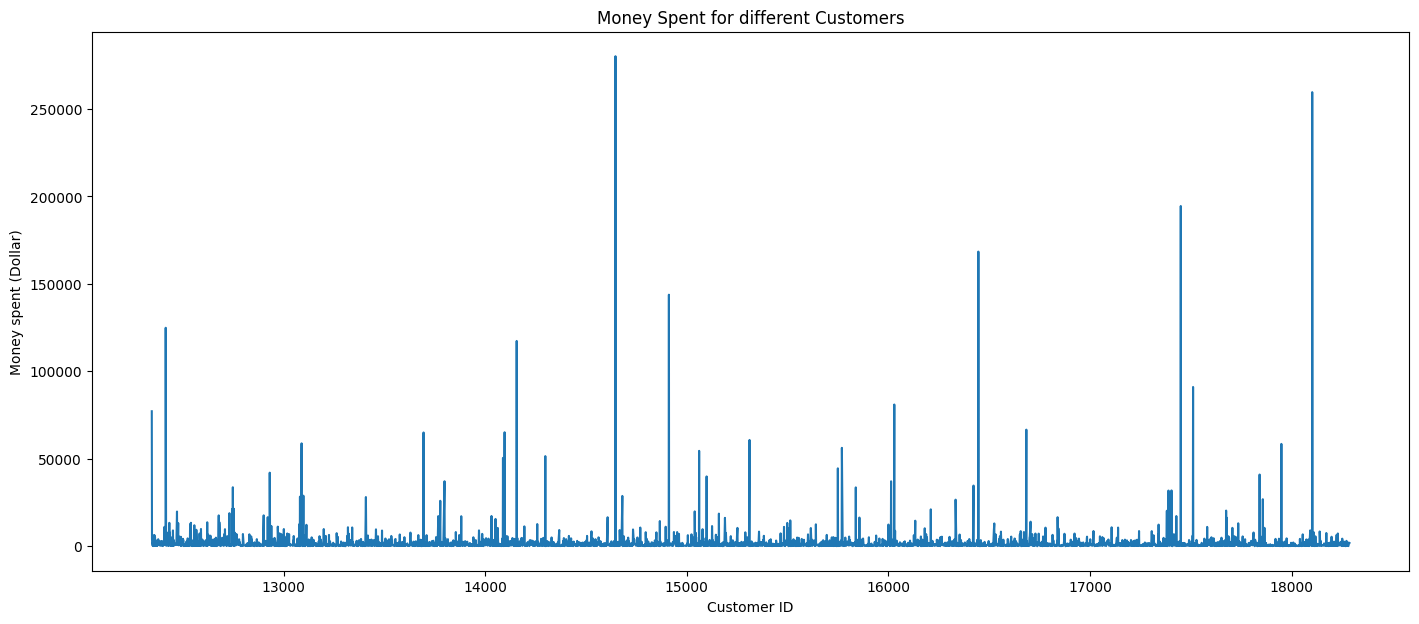

In [ ]:
amount = df.groupby(['CustomerID', 'Country'], as_index=False)['Total'].sum()

plt.subplots(figsize=(17,7))
plt.plot(amount.CustomerID, amount.Total)
plt.xlabel('Customer ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

Топ 5 покупателей

In [ ]:
amount.sort_values('Total', ascending=False).head()

,CustomerID,Country,Total
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


<Axes: xlabel='CustomerID,Country'>

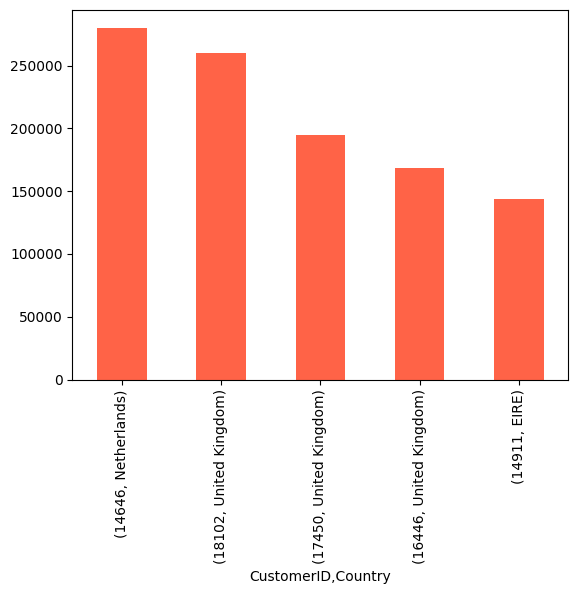

In [ ]:
df.groupby(['CustomerID','Country'])['Total'].sum().sort_values(ascending = False).head().plot(kind = 'bar', color='tomato')

Топ 25 самых продаваемых товаров по количеству

Text(0, 0.5, 'Quantity')

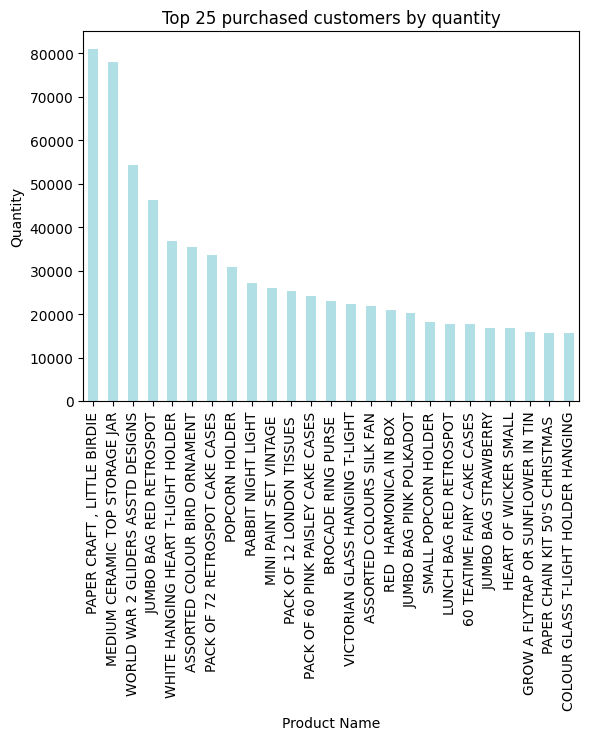

In [ ]:
most_sold = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False)
top25 = most_sold[0:25].plot(kind = 'bar', color='powderblue')
top25.set_title("Top 25 purchased customers by quantity")
top25.set_xlabel("Product Name")
top25.set_ylabel("Quantity")

Топ 20 самых продаваемых товаров по количеству заказов от покупателей

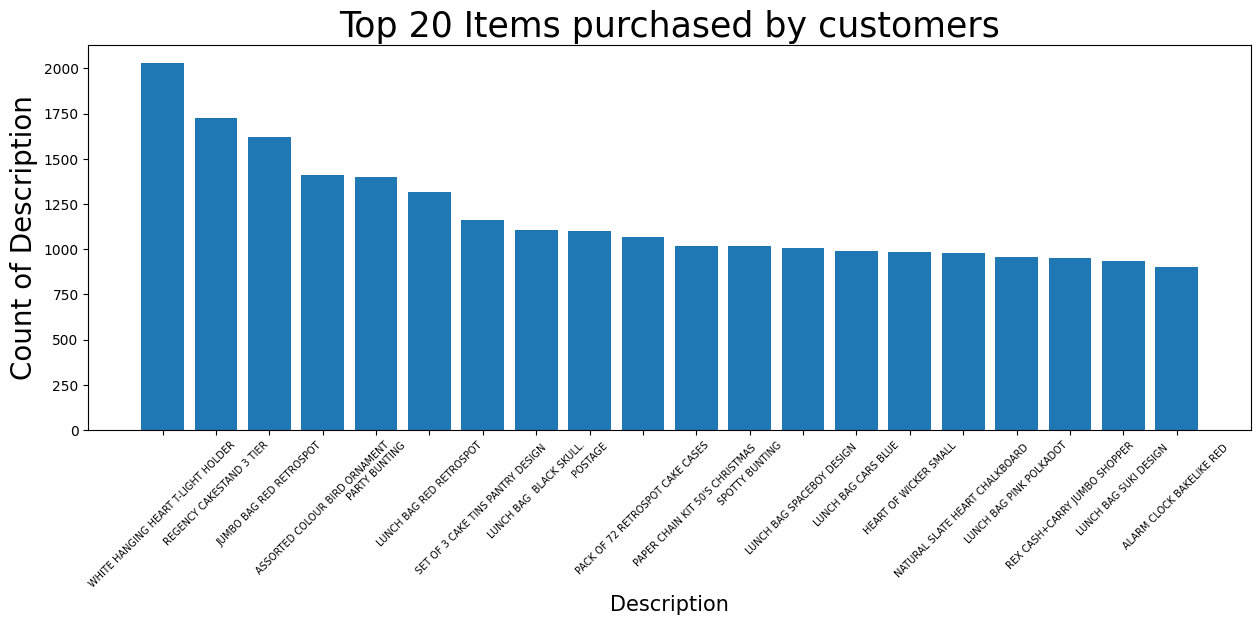

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df.Description.value_counts().head(20).index, df.Description.value_counts().head(20).values)
plt.xlabel('Description', size = 15)
plt.xticks(rotation=45, fontsize=7)
plt.ylabel('Count of Description', size = 20)
plt.title('Top 20 Items purchased by customers', size = 25)
plt.show()

## Транзакции

In [ ]:
transactions_str = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index(name ='Count')
transactions_str

,CustomerID,Description,Count
0,12346,MEDIUM CERAMIC TOP STORAGE JAR,74215
1,12347,3D DOG PICTURE PLAYING CARDS,126
2,12347,3D SHEET OF CAT STICKERS,12
3,12347,3D SHEET OF DOG STICKERS,12
4,12347,60 TEATIME FAIRY CAKE CASES,72
...,...,...,...
268290,18287,STAR T-LIGHT HOLDER WILLIE WINKIE,12
268291,18287,STRAWBERRY BATH SPONGE,30
268292,18287,STRAWBERRY CERAMIC TRINKET BOX,12
268293,18287,SWISS CHALET TREE DECORATION,48


In [ ]:
basket = transactions_str.pivot_table(index='CustomerID', columns='Description', values='Count', aggfunc='sum').fillna(0)
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

<ipython-input-100-a797a52c4f79>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


## Apriori

Алгоритм Apriori — это один из популярных методов в машинном обучении, используемый для поиска частых наборов элементов и формирования ассоциативных правил. Его основная цель — находить группы предметов, которые часто встречаются вместе в наборе данных, например, в корзинах покупок.

Шаг 1: Алгоритм считает поддержку каждого отдельного товара
Шаг 2: Алгоритм начинает комбинировать товары в пары
Шаг 3: Алгоритм пробует создать тройки

In [ ]:
def generate_new_combinations(old_combinations, X, min_support, is_sparse):
    items_in_previous_step = np.unique(old_combinations.flatten()) # Извлекает уникальные элементы из предыдущих комбинаций
    rows_count = X.shape[0]
    threshold = min_support * rows_count # Определяет минимальное количество строк (транзакций), в которых должна встречаться комбинация, чтобы она считалась частой


    # Проходит по каждой комбинации из предыдущего шага
    # Подготовка для расширения текущей комбинации новыми элементами и проверки их частоты
    for old_combination in old_combinations:
        max_item = old_combination[-1]
        valid_items = items_in_previous_step[items_in_previous_step > max_item]
        old_tuple = tuple(old_combination)

        # Проверка типа данных
        if is_sparse:
            mask_rows = X[:, old_tuple].toarray().all(axis=1)
            supports = X[mask_rows][:, valid_items].toarray().sum(axis=0)
        else:
            mask_rows = X[:, old_tuple].all(axis=1)
            supports = X[mask_rows][:, valid_items].sum(axis=0)

        # Проходит по индексам элементов, чья поддержка больше или равна threshold
        # Сначала возвращает (с помощью yield) частоту текущей комбинации
        # Затем возвращает все элементы из предыдущей комбинации
        # И в конце возвращает новый элемент, добавленный к комбинации
        for index in np.where(supports >= threshold)[0]:
            yield supports[index]
            yield from old_tuple
            yield valid_items[index]

In [ ]:
def apriori(df, min_support=0.5, use_colnames=False, max_len=None):
    # Cчитает поддержку каждого отдельного элемента
    def calculate_support(X, n_rows):
        return np.sum(X, axis=0) / n_rows

    X = df.values
    n_rows = X.shape[0]
    support = calculate_support(X, n_rows)
    is_sparse = False

    # Определяет, какие элементы имеют поддержку больше или равную порогу min_support
    frequent_items = support >= min_support
    # Сохраняет поддержку для всех частых элементов в виде словаря, где ключом является размер набора
    support_dict = {1: support[frequent_items]}
    # Создает словарь с частыми элементами, где ключом также является размер набора
    itemset_dict = {1: np.where(frequent_items)[0].reshape(-1, 1)}
    max_itemset = 1 # Переменная, которая отслеживает текущий размер набора элементов

    # Генерирует новые комбинации элементов
    # Преобразует результат генерации комбинаций в массив с помощью np.fromiter
    while max_itemset and (max_len is None or max_itemset < max_len):
        next_max_itemset = max_itemset + 1
        combin = generate_new_combinations(itemset_dict[max_itemset], X, min_support, is_sparse)
        combin = np.fromiter(combin, dtype=int).reshape(-1, next_max_itemset + 1)

        if combin.size == 0:
            break

        itemset_dict[next_max_itemset] = combin[:, 1:]
        support_dict[next_max_itemset] = combin[:, 0].astype(float) / n_rows
        max_itemset = next_max_itemset

    result = []
    for k in sorted(itemset_dict):
        support_series = pd.Series(support_dict[k])
        itemsets_series = pd.Series([frozenset(i) for i in itemset_dict[k]], dtype="object")
        result.append(pd.concat((support_series, itemsets_series), axis=1))

    res_df = pd.concat(result)
    res_df.columns = ["support", "itemsets"]

    if use_colnames:
        mapping = {idx: col_name for idx, col_name in enumerate(df.columns)}
        res_df["itemsets"] = res_df["itemsets"].apply(lambda x: frozenset(mapping[i] for i in x))

    return res_df.reset_index(drop=True)

Функция association_rules находит ассоциативные правила на основе частых наборов элементов, найденных ранее (например, с помощью алгоритма Apriori). Эти правила помогают выявить закономерности между товарами или событиями, например: "если купили хлеб, то часто покупают и молоко

min_threshold — минимальное значение метрики, необходимое для включения правила в результат. Например, если min_threshold = 0.8 и выбрана метрика confidence, будут возвращены только правила с доверием не ниже 80%

Основные метрики в metric_dict:

antecedent support — поддержка левой части правила (антецедента, то есть "если").

consequent support — поддержка правой части правила (консеквента, то есть "то").

support — поддержка всего правила (совместное появление антецедента и консеквента).

confidence — доверие. Это вероятность того, что если антецедент произошел, то произойдет и консеквент.

lift — подъем. Показывает, насколько сильна взаимосвязь между антецедентом и консеквентом по сравнению с их независимым появлением.

Если найдены правила, они сохраняются в DataFrame, где каждой строке соответствуют:

antecedents —  это то, что происходит первым или является причиной.

consequents — это то, что следует за антецедентом и является следствием его появления.

Вспомогательные функции:

conviction_helper — вычисляет метрику conviction. Она показывает, насколько часто появление одного элемента увеличивает вероятность появления другого.

zhangs_metric_helper — вычисляет метрику Zhang's metric, которая показывает силу зависимости между элементами.

In [ ]:
from itertools import combinations

def association_rules(df, metric="confidence", min_threshold=0.8, support_only=False):

    def conviction_helper(sAC, sA, sC):
        confidence = sAC / sA
        conviction = np.full(confidence.shape, np.inf, dtype=float)
        mask = confidence < 1.0
        conviction[mask] = (1.0 - sC[mask]) / (1.0 - confidence[mask])
        return conviction

    def zhangs_metric_helper(sAC, sA, sC):
        denominator = np.maximum(sAC * (1 - sA), sA * (sC - sAC))
        numerator = metric_dict["leverage"](sAC, sA, sC)
        with np.errstate(divide="ignore", invalid="ignore"):
            zhangs_metric = np.where(denominator == 0, 0, numerator / denominator)
        return zhangs_metric

    metric_dict = {
        "antecedent support": lambda _, sA, __: sA,
        "consequent support": lambda _, __, sC: sC,
        "support": lambda sAC, _, __: sAC,
        "confidence": lambda sAC, sA, _: sAC / sA,
        "lift": lambda sAC, sA, sC: (sAC / sA) / sC,
    }

    columns_ordered = [
        "antecedent support",
        "consequent support",
        "support",
        "confidence",
        "lift",
    ]

    if support_only:
        metric = "support"

    keys = df["itemsets"].values
    values = df["support"].values
    frequent_items_dict = dict(zip(map(frozenset, keys), values))

    rule_antecedents = []
    rule_consequents = []
    rule_supports = []

    for k, sAC in frequent_items_dict.items():
        for idx in range(len(k) - 1, 0, -1):
            for c in combinations(k, r=idx):
                antecedent = frozenset(c)
                consequent = k.difference(antecedent)

                if not support_only:
                    sA = frequent_items_dict[antecedent]
                    sC = frequent_items_dict[consequent]
                else:
                    sA, sC = None, None

                score = metric_dict[metric](sAC, sA, sC)
                if score >= min_threshold:
                    rule_antecedents.append(antecedent)
                    rule_consequents.append(consequent)
                    rule_supports.append([sAC, sA, sC])

    if not rule_supports:
        return pd.DataFrame(columns=["antecedents", "consequents"] + columns_ordered)

    rule_supports = np.array(rule_supports).T.astype(float)
    df_res = pd.DataFrame(
        data=list(zip(rule_antecedents, rule_consequents)),
        columns=["antecedents", "consequents"],
    )

    if support_only:
        df_res["support"] = rule_supports[0]
        for m in columns_ordered[1:]:
            df_res[m] = np.nan
    else:
        sAC, sA, sC = rule_supports
        for m in columns_ordered:
            df_res[m] = metric_dict[m](sAC, sA, sC)

    return df_res

In [ ]:
%time frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

CPU times: user 4.8 s, sys: 6.4 ms, total: 4.8 s
Wall time: 4.88 s


,support,itemsets
0,0.053238,(12 PENCILS SMALL TUBE RED RETROSPOT)
1,0.066375,(3 STRIPEY MICE FELTCRAFT)
2,0.059922,(4 TRADITIONAL SPINNING TOPS)
3,0.054160,(6 GIFT TAGS 50'S CHRISTMAS )
4,0.052316,(6 GIFT TAGS VINTAGE CHRISTMAS )
...,...,...
349,0.050703,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."
350,0.051164,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,..."
351,0.050703,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,..."
352,0.053699,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."


In [ ]:
%time rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

CPU times: user 5.99 ms, sys: 0 ns, total: 5.99 ms
Wall time: 5.72 ms


In [ ]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
208,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.053699,0.089191,0.051625,0.961373,10.778809
172,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.062687,0.089191,0.060152,0.959559,10.758464
166,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.059691,0.089191,0.056465,0.945946,10.605838
16,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073519,0.089191,0.068218,0.927900,10.403506
210,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER ),0.056465,0.097488,0.051625,0.914286,9.378453
...,...,...,...,...,...,...,...
8,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.197280,0.156257,0.054621,0.276869,1.771881
205,(REGENCY CAKESTAND 3 TIER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.203042,0.062687,0.053699,0.264472,4.218915
64,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.197280,0.146347,0.051164,0.259346,1.772128
218,(REGENCY CAKESTAND 3 TIER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.203042,0.060152,0.051625,0.254257,4.226893


## FPTree

Более эффективен, чем традиционный алгоритм Apriori, так как не требует генерации кандидатов и использует структуру данных, называемую деревом FP (Frequent Pattern Tree)

Основные компоненты алгоритма

FP-дерево:

Структура, которая хранит данные о частых элементах и их частотах. Корень дерева представляет собой пустой узел, а дочерние узлы представляют элементы транзакций.
Каждый путь от корня к листу представляет набор элементов, встречающихся вместе.


FP-узел:

Каждый узел FP-дерева содержит элемент, его частоту и ссылку на родительский узел. Узлы связаны между собой, что позволяет эффективно находить все пути.

In [ ]:
class FPTree:
    def __init__(self, rank=None):
        self.root = FPNode(None)
        self.nodes = collections.defaultdict(list)
        self.cond_items = []
        self.rank = rank

    def conditional_tree(self, cond_item, minsup):
        branches = []
        count = collections.defaultdict(int)

        for node in self.nodes[cond_item]:
            branch = node.itempath_from_root()
            branches.append(branch)
            for item in branch:
                count[item] += node.count

        items = [item for item in count if count[item] >= minsup]
        items.sort(key=count.get)
        rank = {item: i for i, item in enumerate(items)}

        cond_tree = FPTree(rank)
        for idx, branch in enumerate(branches):
            filtered_branch = [i for i in branch if i in rank]
            filtered_branch.sort(key=rank.get, reverse=True)
            cond_tree.insert_itemset(filtered_branch, self.nodes[cond_item][idx].count)

        cond_tree.cond_items = self.cond_items + [cond_item]

        return cond_tree

    def insert_itemset(self, itemset, count=1):
        self.root.count += count
        node = self.root

        for item in itemset:
            if item in node.children:
                node = node.children[item]
                node.count += count
            else:
                child_node = FPNode(item, count, node)
                self.nodes[item].append(child_node)
                node = child_node

    def is_path(self):
        if len(self.root.children) > 1:
            return False
        for item_nodes in self.nodes.values():
            if len(item_nodes) > 1 or (item_nodes and len(item_nodes[0].children) > 1):
                return False
        return True


class FPNode:
    def __init__(self, item, count=0, parent=None):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}

        if parent:
            parent.children[item] = self

    def itempath_from_root(self):
        path = []
        node = self

        while node.parent and node.parent.item is not None:
            node = node.parent
            path.append(node.item)

        path.reverse()
        return path


def generate_itemsets(generator, num_itemsets, colname_map):
    itemsets = []
    supports = []

    for sup, iset in generator:
        itemsets.append(frozenset(iset))
        supports.append(sup / num_itemsets)

    res_df = pd.DataFrame({"support": supports, "itemsets": itemsets})

    if colname_map is not None:
        res_df["itemsets"] = res_df["itemsets"].apply(
            lambda x: frozenset([colname_map[i] for i in x])
        )

    return res_df


def setup_fptree(df, min_support):
    num_itemsets = len(df)
    itemsets = df.values

    item_support = np.sum(itemsets, axis=0) / float(num_itemsets)
    items = np.where(item_support >= min_support)[0]

    indices = np.argsort(item_support[items])
    rank = {item: i for i, item in enumerate(items[indices])}

    tree = FPTree(rank)
    for i in range(num_itemsets):
        nonnull = np.where(itemsets[i])[0]
        filtered_itemset = [item for item in nonnull if item in rank]
        filtered_itemset.sort(key=rank.get, reverse=True)
        tree.insert_itemset(filtered_itemset)

    return tree, rank


def fpgrowth(df, min_support=0.5, use_colnames=False, max_len=None):
    colname_map = {idx: item for idx, item in enumerate(df.columns)} if use_colnames else None

    tree, _ = setup_fptree(df, min_support)
    minsup = math.ceil(min_support * len(df))
    generator = fpg_step(tree, minsup, max_len)

    return generate_itemsets(generator, len(df), colname_map)


def fpg_step(tree, minsup, max_len):
    items = list(tree.nodes.keys())

    if tree.is_path():
        size_remain = min(len(items) + 1, max_len - len(tree.cond_items) + 1 if max_len else len(items) + 1)
        for i in range(1, size_remain):
            for itemset in combinations(items, i):
                support = min(tree.nodes[i][0].count for i in itemset)
                yield support, tree.cond_items + list(itemset)
    elif not max_len or max_len > len(tree.cond_items):
        for item in items:
            support = sum(node.count for node in tree.nodes[item])
            yield support, tree.cond_items + [item]

    if not tree.is_path() and (not max_len or max_len > len(tree.cond_items)):
        for item in items:
            cond_tree = tree.conditional_tree(item, minsup)
            yield from fpg_step(cond_tree, minsup, max_len)

In [ ]:
%time frequent_items_fpgrowth = fpgrowth(basket_sets, min_support=0.05, use_colnames=True)
frequent_items_fpgrowth

CPU times: user 2.45 s, sys: 2.39 ms, total: 2.45 s
Wall time: 2.45 s


,support,itemsets
0,0.203042,(REGENCY CAKESTAND 3 TIER)
1,0.103711,(RABBIT NIGHT LIGHT)
2,0.097488,(ROSES REGENCY TEACUP AND SAUCER )
3,0.095414,(60 TEATIME FAIRY CAKE CASES)
4,0.089422,(ALARM CLOCK BAKELIKE RED )
...,...,...
349,0.064992,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
350,0.070984,"(HEART OF WICKER SMALL, HEART OF WICKER LARGE)"
351,0.061074,"(WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ..."
352,0.057847,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE..."


In [ ]:
%time rules_fpgrowth = association_rules(frequent_items_fpgrowth, metric = "lift", min_threshold = 1)
rules_fpgrowth.sort_values('confidence', ascending = False, inplace = True)
rules_fpgrowth

CPU times: user 5.62 ms, sys: 0 ns, total: 5.62 ms
Wall time: 5.38 ms


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
40,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.053699,0.089191,0.051625,0.961373,10.778809
22,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.062687,0.089191,0.060152,0.959559,10.758464
28,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.059691,0.089191,0.056465,0.945946,10.605838
16,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073519,0.089191,0.068218,0.927900,10.403506
42,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER ),0.056465,0.097488,0.051625,0.914286,9.378453
...,...,...,...,...,...,...,...
176,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.197280,0.156257,0.054621,0.276869,1.771881
37,(REGENCY CAKESTAND 3 TIER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.203042,0.062687,0.053699,0.264472,4.218915
112,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.197280,0.146347,0.051164,0.259346,1.772128
50,(REGENCY CAKESTAND 3 TIER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.203042,0.060152,0.051625,0.254257,4.226893
